In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [44]:
import imageio

In [21]:
df = pd.read_csv('data/fashion-product-images-small/styles.csv', error_bad_lines=False)

b'Skipping line 6044: expected 10 fields, saw 11\nSkipping line 6569: expected 10 fields, saw 11\nSkipping line 7399: expected 10 fields, saw 11\nSkipping line 7939: expected 10 fields, saw 11\nSkipping line 9026: expected 10 fields, saw 11\nSkipping line 10264: expected 10 fields, saw 11\nSkipping line 10427: expected 10 fields, saw 11\nSkipping line 10905: expected 10 fields, saw 11\nSkipping line 11373: expected 10 fields, saw 11\nSkipping line 11945: expected 10 fields, saw 11\nSkipping line 14112: expected 10 fields, saw 11\nSkipping line 14532: expected 10 fields, saw 11\nSkipping line 15076: expected 10 fields, saw 12\nSkipping line 29906: expected 10 fields, saw 11\nSkipping line 31625: expected 10 fields, saw 11\nSkipping line 33020: expected 10 fields, saw 11\nSkipping line 35748: expected 10 fields, saw 11\nSkipping line 35962: expected 10 fields, saw 11\nSkipping line 37770: expected 10 fields, saw 11\nSkipping line 38105: expected 10 fields, saw 11\nSkipping line 38275: ex

In [89]:
from os import listdir
from os.path import isfile, join
pic_files = [f for f in listdir('data/fashion-product-images-small/images') if isfile(join('data/fashion-product-images-small/images', f))]

In [90]:
pic_files

['9733.jpg',
 '14147.jpg',
 '52112.jpg',
 '6400.jpg',
 '34297.jpg',
 '24084.jpg',
 '12536.jpg',
 '54563.jpg',
 '15259.jpg',
 '35189.jpg',
 '44770.jpg',
 '4217.jpg',
 '47279.jpg',
 '36480.jpg',
 '16750.jpg',
 '50705.jpg',
 '26693.jpg',
 '37946.jpg',
 '3578.jpg',
 '40516.jpg',
 '10321.jpg',
 '16988.jpg',
 '59047.jpg',
 '2666.jpg',
 '41608.jpg',
 '46167.jpg',
 '5109.jpg',
 '46601.jpg',
 '11981.jpg',
 '20584.jpg',
 '17328.jpg',
 '49532.jpg',
 '10447.jpg',
 '56412.jpg',
 '59721.jpg',
 '30797.jpg',
 '2100.jpg',
 '11759.jpg',
 '40270.jpg',
 '19305.jpg',
 '4571.jpg',
 '16036.jpg',
 '22393.jpg',
 '44016.jpg',
 '7078.jpg',
 '32180.jpg',
 '43779.jpg',
 '9055.jpg',
 '14621.jpg',
 '45308.jpg',
 '6366.jpg',
 '44002.jpg',
 '32194.jpg',
 '12244.jpg',
 '52660.jpg',
 '23099.jpg',
 '14635.jpg',
 '9041.jpg',
 '6372.jpg',
 '11995.jpg',
 '46615.jpg',
 '49526.jpg',
 '20590.jpg',
 '51369.jpg',
 '56406.jpg',
 '10453.jpg',
 '2114.jpg',
 '30783.jpg',
 '59735.jpg',
 '57718.jpg',
 '40264.jpg',
 '4565.jpg',
 '19311

In [91]:
pic_arr = np.array(pic_files)

In [133]:
def get_pixels(files):
    pix_list = []
    for each in files:
        img = imageio.imread(('data/fashion-product-images-small/images/' + each))
        flat = np.array(img).flatten()
        pix_list.append(flat)
    return pix_list

In [138]:
images_col = get_pixels(pic_arr)

In [141]:
idx_series = file_series.str.replace('.jpg', "").astype(int)
pix_series = pd.Series(images_col)

In [144]:
pic_df = pd.DataFrame(pix_series, index=idx_series, columns=['Pix'])

In [156]:
xx = pic_df.iloc[0,0]
tt = xx.reshape(80,60,3)

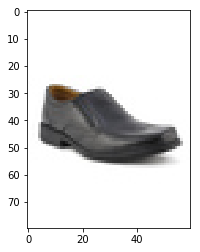

In [157]:
plt.imshow(tt)

In [19]:
model = LogisticRegression(multi_class='ovr')
model.fit(X_train, y_train)

/Users/Kelly/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Kelly/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
y = df.iloc[0:10000,0]
X = df.iloc[0:10000,1:]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [8]:
yhat = model.predict(X_test)

In [11]:
model.score(X_test, y_test)

0.752